# Modelling (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [33]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from statsmodels.formula.api import ols
from scipy.stats import zscore
from scipy import stats

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

from sklearn.preprocessing import LabelEncoder, scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
import warnings
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [4]:
df = pd.read_csv("covtype_EDA.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,3747,...,0,0,0,0,0,0,1,0,0,0
1,2590,56,2,212,-6,390,220,235,151,3747,...,0,0,0,0,0,0,1,0,0,0
2,2804,139,9,268,65,3180,234,238,135,3747,...,0,0,0,0,0,0,1,0,0,0
3,2785,155,18,242,118,3090,238,238,122,3747,...,0,0,0,0,0,0,1,0,0,0
4,2595,45,2,153,-1,391,220,234,150,3747,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df.shape

(575912, 54)

In [6]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type', 'Soil_Type1',
       'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13',
       'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type2', 'Soil_Type20', 'Soil_Type21',
       'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
       'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29',
       'Soil_Type3', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type4',
       'Soil_Type40', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Wilderness_Area1', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4'

## Undersampling
* Data is large and unbalanced. Oversampling has many challanges for this data. So we use `UNDERSAMPLING` technique. We choose a sample according to Cover Type 4 that has the least row counts(2369).

In [7]:
df.Cover_Type.value_counts()

2    283069
1    211761
3     32522
7     20510
6     16191
5      9490
4      2369
Name: Cover_Type, dtype: int64

In [49]:
row_num=df.Cover_Type.value_counts().min()

In [21]:
df2=pd.DataFrame()

for i in df.Cover_Type.unique():
    df2=pd.concat([df2,df[df.Cover_Type==i].sample(row_num)])
    

In [23]:
df2.Cover_Type.value_counts()

7    2369
6    2369
5    2369
4    2369
3    2369
2    2369
1    2369
Name: Cover_Type, dtype: int64

In [24]:
X = df2.drop("Cover_Type", axis = 1)
y = df2["Cover_Type"]

### Standarization

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# ``1.XGBoost Classifer``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [28]:
xgb= XGBClassifier()
xgb.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_pred = xgb.predict(X_test)

**Evaluate the performance**

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.81      0.78      0.79       510
           2       0.75      0.71      0.73       462
           3       0.88      0.85      0.86       481
           4       0.94      0.97      0.95       428
           5       0.90      0.94      0.92       476
           6       0.84      0.88      0.86       463
           7       0.96      0.97      0.97       497

    accuracy                           0.87      3317
   macro avg       0.87      0.87      0.87      3317
weighted avg       0.87      0.87      0.87      3317



In [34]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.8694603557431414 
xgb_f1_score: 0.8683088288231541 
xgb_recall: 0.8694603557431414


**Tunning XGBOOST**

In [35]:
xgb_params = {"n_estimators": [50,300,500],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,9,17],
             "learning_rate":[0.1,0.01,0.3]}

In [157]:
# xgb_grid= GridSearchCV(xgb, xgb_params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [36]:
# xgb_grid= RandomizedSearchCV(xgb, xgb_params, cv = 5, 
#                             n_iter=10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.8min finished


In [38]:
# xgb_grid.best_params_

{'subsample': 0.5, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.3}

In [42]:
xgb_tuned = XGBClassifier(learning_rate= 0.3, 
                                max_depth= 15, 
                                n_estimators= 200, 
                                subsample= 0.7).fit(X_train, y_train)

In [43]:
y_pred = xgb_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.80      0.81       510
           2       0.80      0.72      0.76       462
           3       0.87      0.86      0.87       481
           4       0.94      0.97      0.95       428
           5       0.92      0.96      0.94       476
           6       0.86      0.88      0.87       463
           7       0.95      0.97      0.96       497

    accuracy                           0.88      3317
   macro avg       0.88      0.88      0.88      3317
weighted avg       0.88      0.88      0.88      3317



In [44]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.8794091046126018 
xgb_f1_score: 0.8780262282844606 
xgb_recall: 0.8794091046126018


**`Cross Validation Scores`**

In [51]:
# xgb_accuracy = cross_val_score(xgb_tuned, X_test, y_test,cv = 10).mean()
# xgb_f1_score = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
# xgb_recall = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
# print('xgb_accuracy:',xgb_accuracy,
#       '\nxgb_f1_score:',xgb_f1_score,
#       '\nxgb_recall:',xgb_recall)

**Visualization of Confusion Matrix with Table**

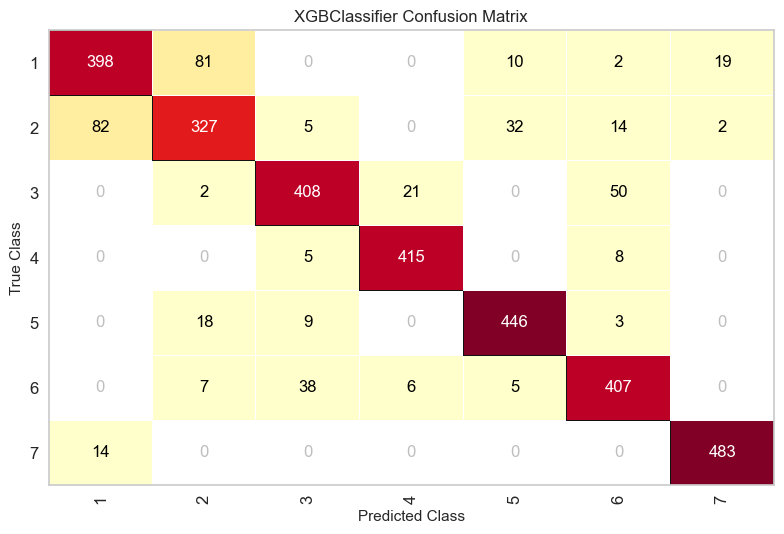

In [52]:
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split as tts
# from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

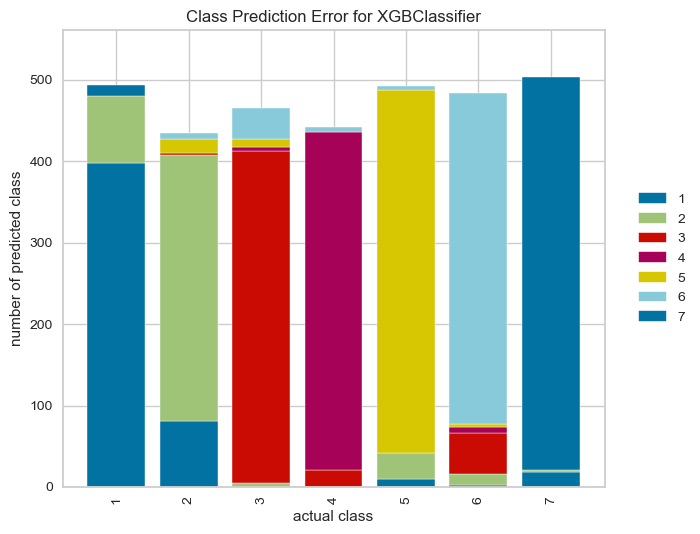

In [53]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``2.Random Forest Classifier``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [54]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred = rfc.predict(X_test)

**Evaluate the performance**

In [56]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[397  74   1   0  12   2  24]
[ 68 340   6   0  32  14   2]
[  0   0 402  31   2  46   0]
[  0   0   9 417   0   2   0]
[  1  20   7   0 445   3   0]
[  0   3  49  17   2 392   0]
[ 16   0   0   0   0   0 481]
              precision    recall  f1-score   support

           1       0.82      0.78      0.80       510
           2       0.78      0.74      0.76       462
           3       0.85      0.84      0.84       481
           4       0.90      0.97      0.93       428
           5       0.90      0.93      0.92       476
           6       0.85      0.85      0.85       463
           7       0.95      0.97      0.96       497

    accuracy                           0.87      3317
   macro avg       0.86      0.87      0.87      3317
weighted avg       0.86      0.87      0.87      3317



In [57]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.8664455833584565 
rfc_f1_score: 0.8650685176245929 
rfc_recall: 0.8664455833584565


**`Cross Validation Scores`**

In [58]:
# rfc_accuracy = cross_val_score(rfc, X_test, y_test,cv = 10).mean()
# rfc_f1_score = cross_val_score(rfc, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
# rfc_recall = cross_val_score(rfc, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
# print('rfc_accuracy:',rfc_accuracy,
#       '\nrfc_f1_score:',rfc_f1_score,
#       '\nrfc_recall:',rfc_recall)

**RF Tunning**

In [59]:
# rfc_params = {"n_estimators":[50, 100, 300],
#               "max_depth":[3,5,7],
#               "max_features": [2,4,6,8],
#               "min_samples_split": [2,4,6]}

In [60]:
# rfc_grid = GridSearchCV(rfc, rfc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [61]:
# rfc_grid.best_params_

In [62]:
# rfc_tuned = RandomForestClassifier(max_depth = 7,             
#                                   max_features = 8, 
#                                   min_samples_split = 2, 
#                                   n_estimators = 1000).fit(X_train, y_train)

In [63]:
# y_pred = rfc_tuned.predict(X_test)
# print(classification_report(y_test, y_pred))

* default degerlerle model daha basarili cikti.

**Visualization of Confusion Matrix with Table**

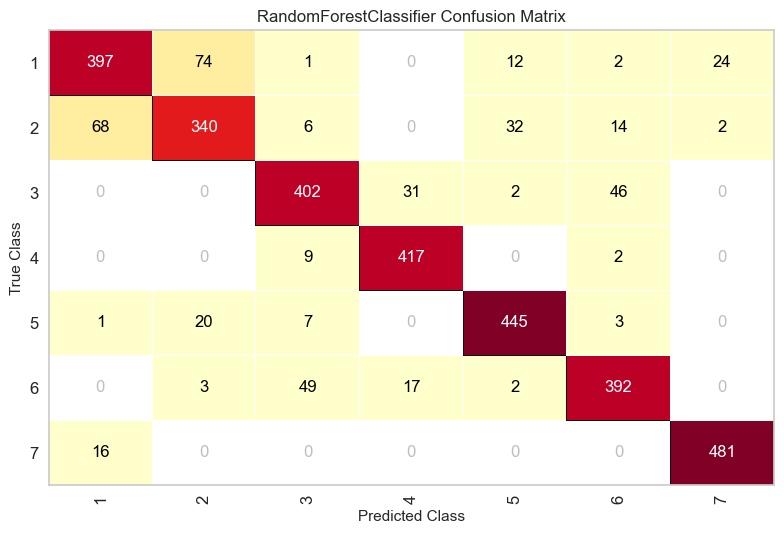

In [64]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rfc)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

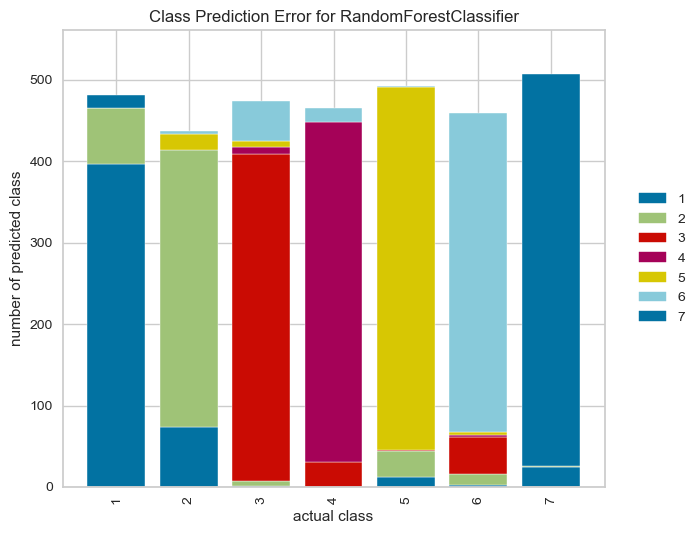

In [65]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``3.KNeighborsClassifer``

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

In [66]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [67]:
y_pred = knn.predict(X_test)

**Visualize Accuracies of Train & Test Data by Different k`s**

In [68]:
neighbors = range(1,8,2) # k nin tek sayi olmasi beklenir.
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

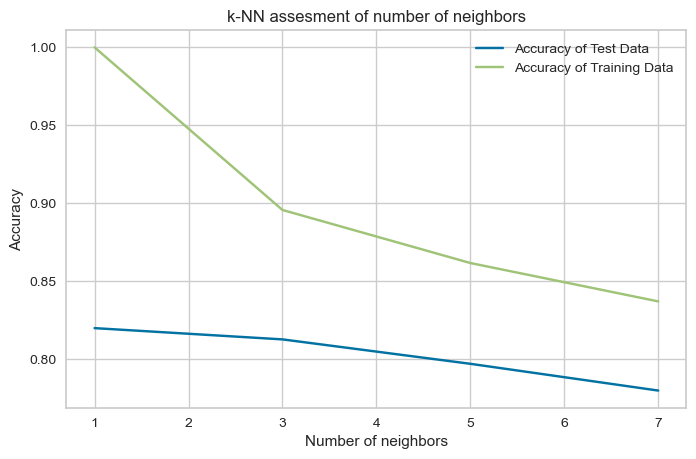

In [69]:
plt.figure(figsize=(8,5))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**Find Optimum K Value with Elbow Method**

In [70]:
error_rate = []
# Her bir error rate icin olusan k degeri bu listeye atilacak
# k nin tek sayi olmasi beklenir.
# Will take some time
for i in range(1,8,2):
    
    model = KNeighborsClassifier(n_neighbors=i) # k= i
    model.fit(X_train,y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test)) 
    

print('Optimum K_Value: ',error_rate.index(min(error_rate))+1)

Optimum K_Value:  1


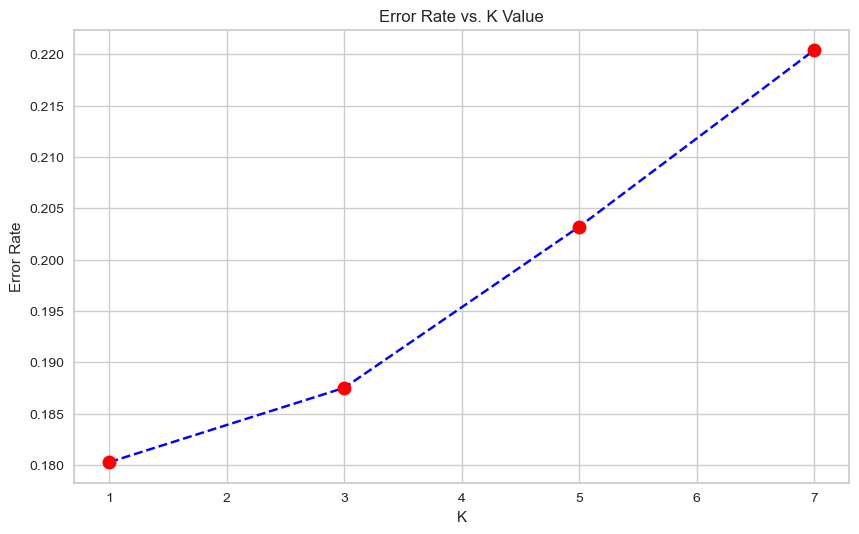

In [71]:
plt.figure(figsize=(10,6))
plt.plot(range(1,8,2),
         error_rate,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

**Tunning KNN with GridSearchCV**

In [73]:
# knn = KNeighborsClassifier()
# knn_params = {"n_neighbors": range(1,8,2)} # k tek sayi olmali

# knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [74]:
# knn_cv_model.best_params_

In [75]:
knn_tuned= KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

**Evaluate the Performance**

In [76]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[376  90   2   0  11   1  30]
[ 84 296  10   0  52  13   7]
[  0   6 353  44  10  68   0]
[  0   0  13 403   0  12   0]
[  7  23   6   0 436   4   0]
[  0   7  62  17   3 374   0]
[ 12   4   0   0   0   0 481]
              precision    recall  f1-score   support

           1       0.78      0.74      0.76       510
           2       0.69      0.64      0.67       462
           3       0.79      0.73      0.76       481
           4       0.87      0.94      0.90       428
           5       0.85      0.92      0.88       476
           6       0.79      0.81      0.80       463
           7       0.93      0.97      0.95       497

    accuracy                           0.82      3317
   macro avg       0.82      0.82      0.82      3317
weighted avg       0.82      0.82      0.82      3317



In [77]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1_score = f1_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
print('knn_accuracy:',knn_accuracy,
      '\nknn_f1_score:',knn_f1_score,
      '\nknn_recall:',knn_recall)

knn_accuracy: 0.8197166113958396 
knn_f1_score: 0.8171271160228187 
knn_recall: 0.8197166113958396


**Visualization of Confusion Matrix with Table**

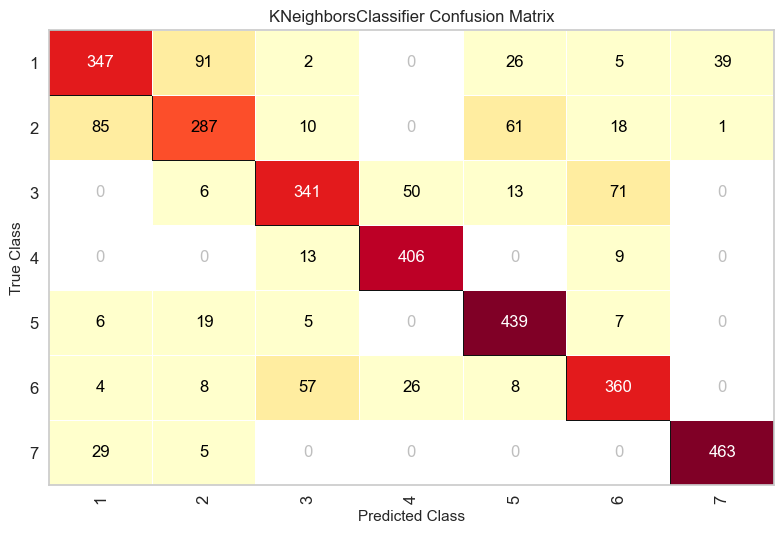

In [78]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(knn)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

In [79]:
# Alternative
# from sklearn.metrics import classification_report,confusion_matrix
# sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label');

**Visualization of Confusion Matrix with Countplot**

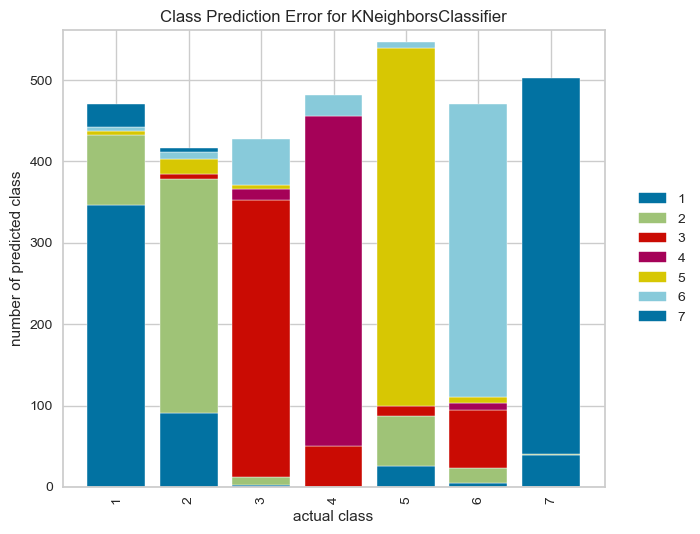

In [80]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(knn)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``4.Decision Tree Classifier``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [81]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

**Evaluate the Performance**

In [82]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[319 136   1   0  13   3  38]
[ 90 306   9   0  39  13   5]
[  0  12 366  27  10  66   0]
[  0   0  18 398   0  12   0]
[  4  36  15   0 417   4   0]
[  2  14  64  10   5 368   0]
[ 41   7   0   0   0   0 449]
              precision    recall  f1-score   support

           1       0.70      0.63      0.66       510
           2       0.60      0.66      0.63       462
           3       0.77      0.76      0.77       481
           4       0.91      0.93      0.92       428
           5       0.86      0.88      0.87       476
           6       0.79      0.79      0.79       463
           7       0.91      0.90      0.91       497

    accuracy                           0.79      3317
   macro avg       0.79      0.79      0.79      3317
weighted avg       0.79      0.79      0.79      3317



In [83]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_f1_score = f1_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='weighted')
print('dt_accuracy:',dt_accuracy,
      '\ndt_f1_score:',dt_f1_score,
      '\ndt_recall:',dt_recall)

dt_accuracy: 0.7907747965028641 
dt_f1_score: 0.7907355231201293 
dt_recall: 0.7907747965028641


**Visualization of Confusion Matrix with Table**

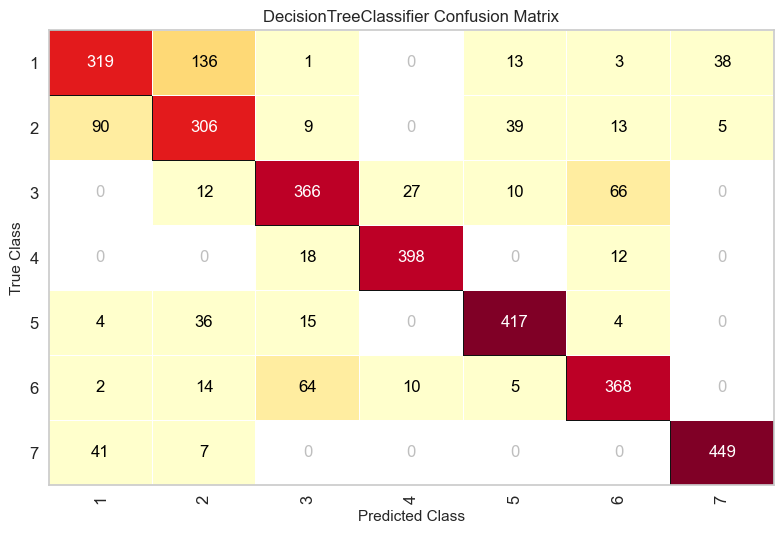

In [84]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(dt)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

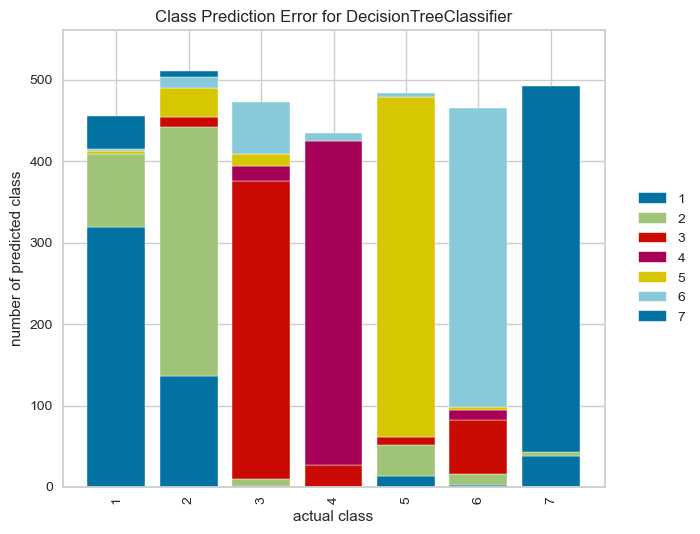

In [85]:
visualizer = ClassPredictionError(dt)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``5. Support Vector Machine``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [86]:
svm = SVC()
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

**Evaluate the Performance**

In [87]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[356  93   1   0  19   7  34]
[ 89 290   5   0  59  18   1]
[  0   4 280  76  11 110   0]
[  0   0   9 401   0  18   0]
[ 11  51  16   0 382  16   0]
[  3   6  87  42   8 317   0]
[ 60   4   1   0   0   0 432]
              precision    recall  f1-score   support

           1       0.69      0.70      0.69       510
           2       0.65      0.63      0.64       462
           3       0.70      0.58      0.64       481
           4       0.77      0.94      0.85       428
           5       0.80      0.80      0.80       476
           6       0.65      0.68      0.67       463
           7       0.93      0.87      0.90       497

    accuracy                           0.74      3317
   macro avg       0.74      0.74      0.74      3317
weighted avg       0.74      0.74      0.74      3317



In [88]:
svm_accuracy = accuracy_score(y_test, y_pred)
svm_f1_score = f1_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
print('svm_accuracy:',svm_accuracy,
      '\nsvm_f1_score:',svm_f1_score,
      '\nsvm_recall:',svm_recall)

svm_accuracy: 0.7410310521555623 
svm_f1_score: 0.7390613932379121 
svm_recall: 0.7410310521555623


**Visualization of Confusion Matrix with Table**

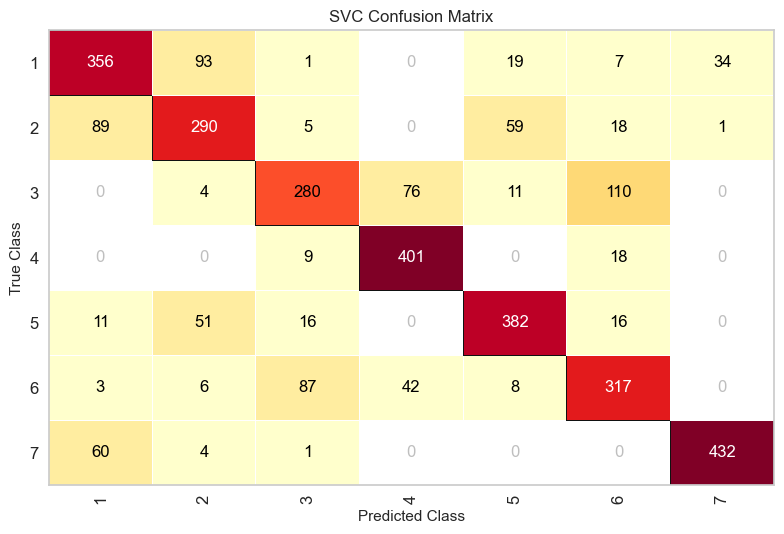

In [89]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(svm)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

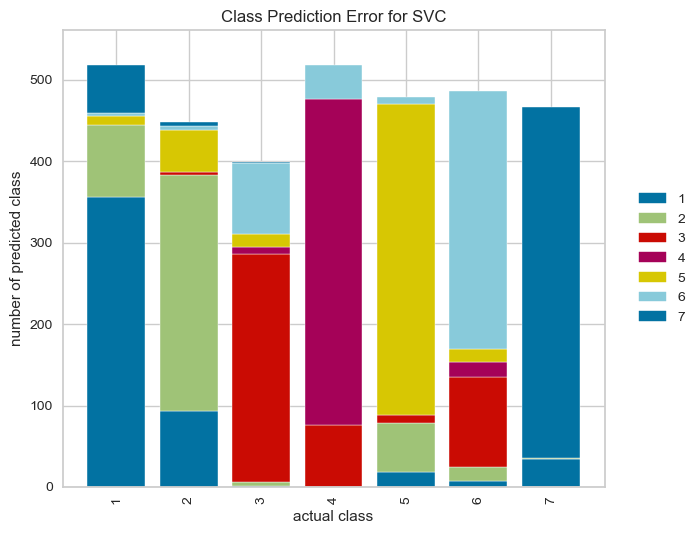

In [90]:
visualizer = ClassPredictionError(svm)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

**Visualization of Classification Report**

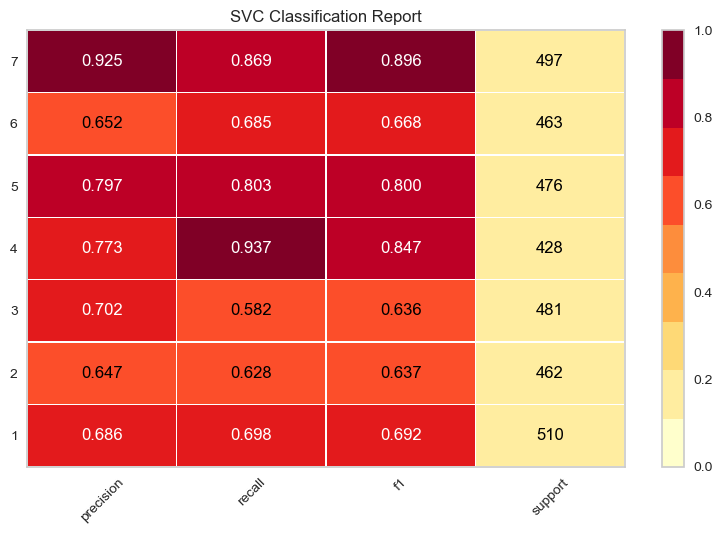

In [91]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

**Tunning SVM**

* if C=1, soft margin
* if C=1000, hard margin
* C, margine yakinlik veya uzakligina gore ceza verir.
* Gamma buyurse daha kompleks siniflandirici haline gelir ve overfitinge gidebilir.
* rbf kullanilacaksa C ve Gamma optimize edilmelidir. Ozellikle Gamma !
* Gamma buyukse, C onemsiz hale gelir.
* 0.0001 < Gamma < 10  
* 0.1 < C < 100

In [92]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1,0.1,0.01,0.001,0.0001], 
#               'kernel': ['rbf']} 

In [93]:
# grid_svc = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# grid_svc.fit(X_train,y_train)
# grid_svc.best_params_

In [94]:
# y_pred = grid_svc.predict(X_test)
# print(classification_report(y_test, y_pred))

### `Comparison of Accuracies & F1 Scores & Recall`
So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

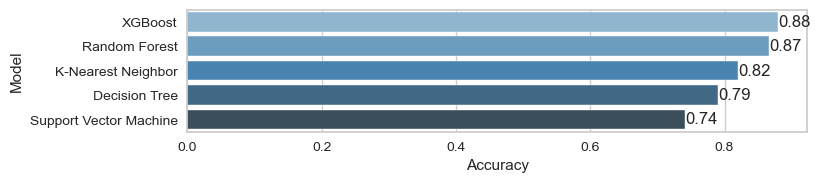

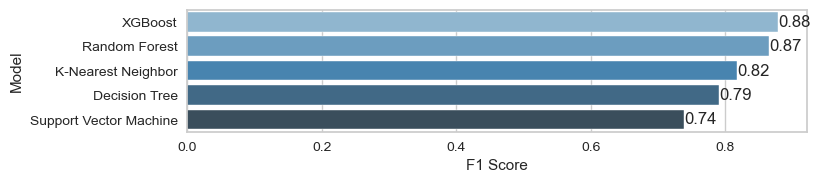

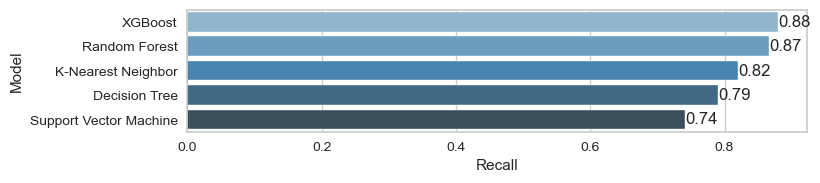

In [95]:
compare = pd.DataFrame({"Model": ["Random Forest", 
                                  "XGBoost",
#                                   "Logistic Regression",
#                                   'Naive Bayes',
#                                   'Ada Boosting',
                                  'Support Vector Machine', 
                                  "Decision Tree",
                                  "K-Nearest Neighbor",
                                 ],
                        "Accuracy": [rfc_accuracy, 
                                     xgb_accuracy, 
#                                      log_accuracy, 
#                                      nb_accuracy,
#                                      ada_accuracy, 
                                     svm_accuracy,
                                     dt_accuracy,
                                     knn_accuracy,
                                     ],
                        "F1 Score": [rfc_f1_score, 
                                     xgb_f1_score, 
#                                      log_f1_score, 
#                                      nb_f1_score, 
#                                      ada_f1_score, 
                                     svm_f1_score, 
                                     dt_f1_score,
                                     knn_f1_score,
                                    ],
                        "Recall": [rfc_recall, 
                                   xgb_recall, 
#                                    log_recall, 
#                                    nb_recall,
#                                    ada_recall, 
                                   svm_recall,
                                   dt_recall,
                                   knn_recall,
                                  ]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    
plt.subplot(311)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(312)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(313)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

### Conclusion
* Finally we trained 5 different Classification models and we got the best F1 Score,Accuracy and Recall of 0.88 for XGBoost Classifier. Now we will train the model with all dataset.

**Training the Model with All Dataset**

In [99]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

In [101]:
xgb_tuned = XGBClassifier(learning_rate= 0.3, 
                                max_depth= 15, 
                                n_estimators= 200, 
                                subsample= 0.7).fit(X, y)

KeyboardInterrupt: 

In [ ]:
y_pred = xgb_tuned.predict(X)
print(classification_report(y, y_pred))

In [ ]:
xgb_accuracy = accuracy_score(y, y_pred)
xgb_f1_score = f1_score(y, y_pred, average='weighted')
xgb_recall = recall_score(y, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

**Saving Model**

In [ ]:
import pickle
pickle.dump(xgb_tuned,open("model","wb"))
xgb_model = pickle.load(open("model","rb"))

**Make a Prediction**

In [ ]:
input={  'Elevation': 3056,
         'Aspect': 272,
         'Slope': 6,
         'Horizontal_Distance_To_Hydrology':319,
         'Vertical_Distance_To_Hydrology': 60,
         'Horizontal_Distance_To_Roadways': 1642,
         'Hillshade_9am':204,
         'Hillshade_Noon':242,
         'Hillshade_3pm':176,
         'Horizontal_Distance_To_Fire_Points':1591,
         'Soil_Type1': 0,
         'Soil_Type10':0,
         'Soil_Type11':0,
         'Soil_Type12':0,
         'Soil_Type13':0,
         'Soil_Type14':0,
         'Soil_Type16':0,
         'Soil_Type17':0,
         'Soil_Type18':0,
         'Soil_Type19':0,
         'Soil_Type2':0,
         'Soil_Type20':0,
         'Soil_Type21':0,
         'Soil_Type22':0,
         'Soil_Type23':1,
         'Soil_Type24':0,
         'Soil_Type25':0,
         'Soil_Type26':0,
         'Soil_Type27':0,
         'Soil_Type28':0,
         'Soil_Type29':0,
         'Soil_Type3':0,
         'Soil_Type30':0,
         'Soil_Type31':0,
         'Soil_Type32':0,
         'Soil_Type33':0,
         'Soil_Type34':0,
         'Soil_Type35':0,
         'Soil_Type36':0,
         'Soil_Type37':0,
         'Soil_Type38':0,
         'Soil_Type39':0,
         'Soil_Type4':0,
         'Soil_Type40':0,
         'Soil_Type5':0,
         'Soil_Type6':0,
         'Soil_Type7':0,
         'Soil_Type8':0,
         'Soil_Type9':0,
         'Wilderness_Area1':0,
         'Wilderness_Area2':0,
         'Wilderness_Area3':1,
         'Wilderness_Area4':0}

In [ ]:
xgb_model.predict(input)